In [5]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [6]:
df =pd.read_csv(r'C:\Users\Mostafa\Downloads\noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
#Data shape
df.shape

(110527, 14)

In [8]:
#check Duplicated.
df.duplicated().sum()

0

In [9]:
#Number of unique value
df['PatientId'].nunique()

62299

In [10]:
#check Number of Duplicated for patientid
df['PatientId'].duplicated().sum()

48228

In [11]:
#check if patient didn't come
df.duplicated(['PatientId','No-show']).sum()

38710

In [12]:
#check missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
#Knowning the nagitive values for Age
clc=df.query('Age=="-1"')
clc

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


## Data Cleaning

In [14]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(index=99832,inplace=True)

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [16]:

df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [17]:
#if patient id has repeated with no show i delete it
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71816, 14)

In [18]:
#remove unimportant data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. 

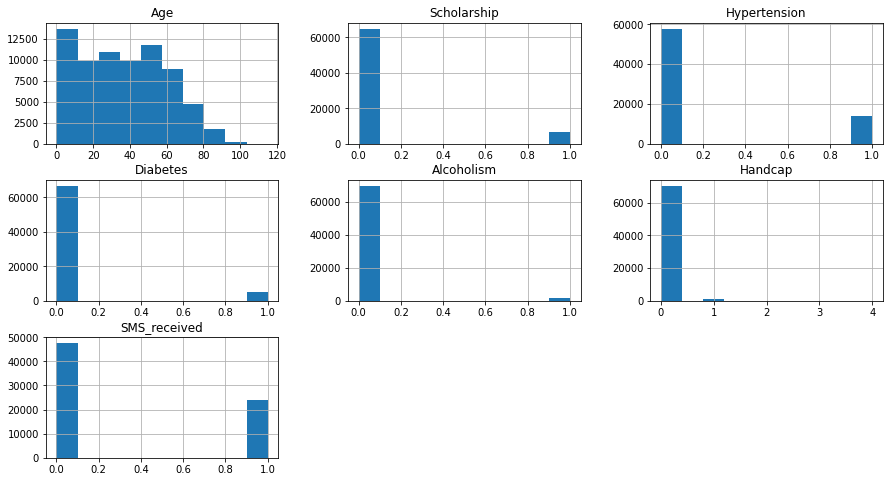

In [19]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,8));

In [20]:
#Make patients 2 group 
df.rename(columns={'No-show':'No_show'},inplace=True)
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110518,F,50,MARIA ORTIZ,0,0,0,0,0,1,No
110520,F,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,F,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No


In [21]:
show=df.No_show=='No'
noshow=df.No_show=='Yes'
df[show].count(),df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64,
 Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [22]:
df[show].mean(),df[noshow].mean()

C:\Users\Mostafa\AppData\Local\Temp\ipykernel_11428\3233283171.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[show].mean(),df[noshow].mean()


(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64,
 Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

## Investigation  for the influencing factors on the attendence rate

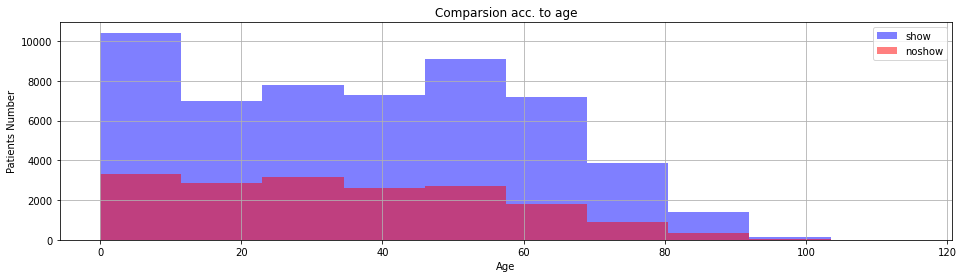

In [23]:
#Age affect on attendance or not?
def attendance(df,col_name,attended,absent):
    
      plt.figure(figsize=[16,4])
      df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
      df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
      plt.legend();
      plt.title('Comparsion acc. to age')
      plt.xlabel('Age')
      plt.ylabel('Patients Number');
        
attendance(df,'Age',show,noshow)

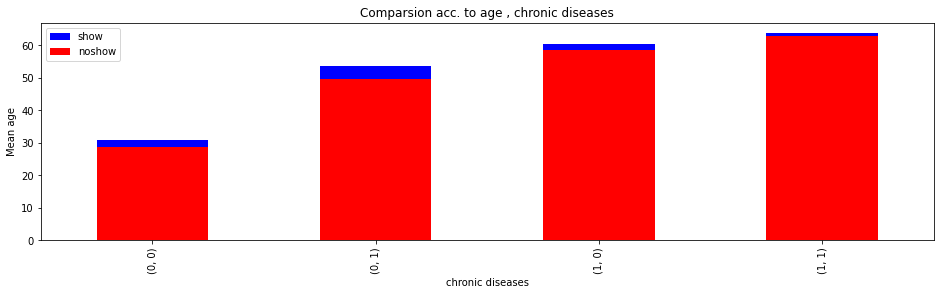

In [24]:
#Age and chronic affect on attendance or not?
plt.figure(figsize=[16,4])
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',label='show')
df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparsion acc. to age , chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');


In [25]:
df[show].groupby(['Hypertension','Diabetes']).mean()['Age'],df[noshow].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

## Gender affect on attendce or not?


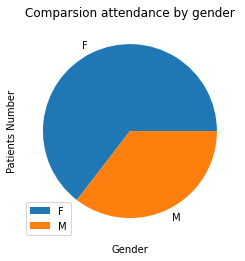

In [26]:
#percentage of attendance?

def attendance(df,col_name,attended,absent):
      plt.figure(figsize=[12,4])
      df[col_name][show].value_counts(normalize=True).plot(kind='pie',label='show')
      plt.legend();
      plt.title('Comparsion attendance by gender')
      plt.xlabel('Gender')
      plt.ylabel('Patients Number');
attendance(df,'Gender',show,noshow)

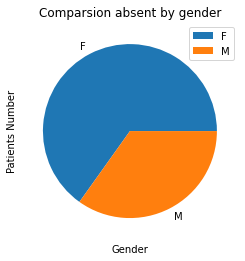

In [27]:
#percentage of absent?

def attendance(df,col_name,attended,absent):
      plt.figure(figsize=[12,4])
      df[col_name][noshow].value_counts(normalize=True).plot(kind='pie',label='show')
      plt.legend();
      plt.title('Comparsion absent by gender')
      plt.xlabel('Gender')
      plt.ylabel('Patients Number');
attendance(df,'Gender',show,noshow)

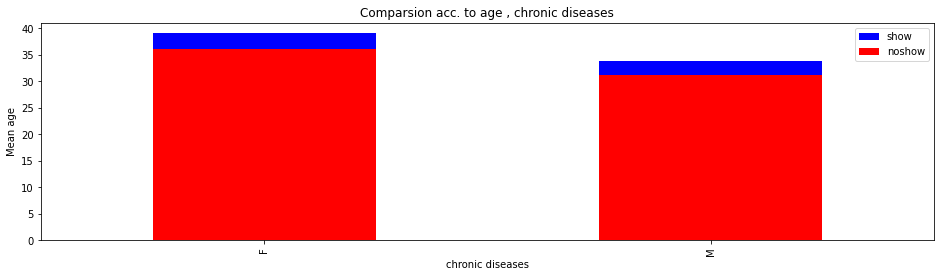

In [28]:
#Age and chronic affect on attendance or not?(check by gender mean age)
plt.figure(figsize=[16,4])
df[show].groupby('Gender').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Gender').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparsion acc. to age , chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('Mean age');

In [29]:
df[show].groupby('Gender').Age.mean(),df[noshow].groupby('Gender').Age.mean(),df[show].groupby('Gender').Age.median(),df[noshow].groupby('Gender').Age.median()

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64,
 Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64,
 Gender
 F    39.0
 M    32.0
 Name: Age, dtype: float64,
 Gender
 F    34.0
 M    29.0
 Name: Age, dtype: float64)

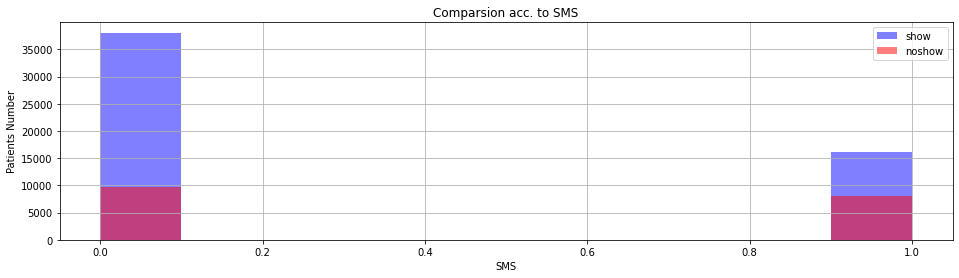

In [30]:
#SMS affect on attendance or not?
#Age affect on attendance or not?
def attendance(df,col_name,attended,absent):
    
      plt.figure(figsize=[16,4])
      df[col_name][show].hist(alpha=.5,bins=10,color='blue',label='show')
      df[col_name][noshow].hist(alpha=.5,bins=10,color='red',label='noshow')
      plt.legend();
      plt.title('Comparsion acc. to SMS')
      plt.xlabel('SMS')
      plt.ylabel('Patients Number');
        
attendance(df,'SMS_received',show,noshow)

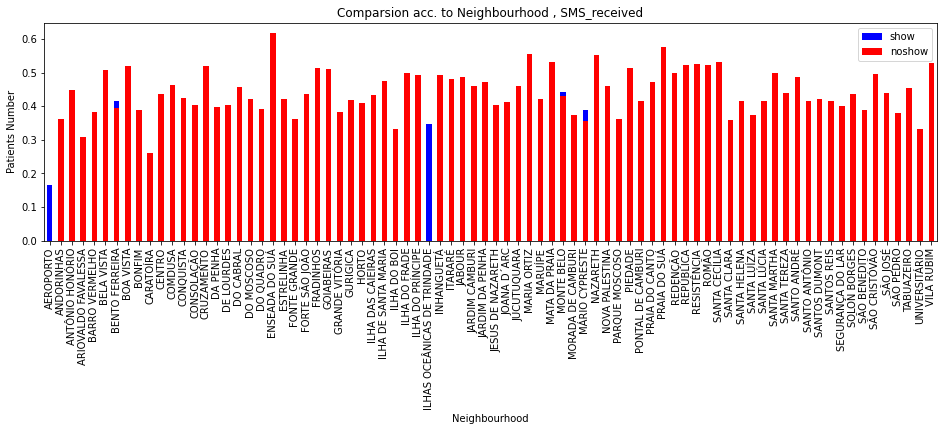

In [31]:
#Neighbourhood and SMS_received affect 

plt.figure(figsize=[16,4])
df[show].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').SMS_received.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparsion acc. to Neighbourhood , SMS_received')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');

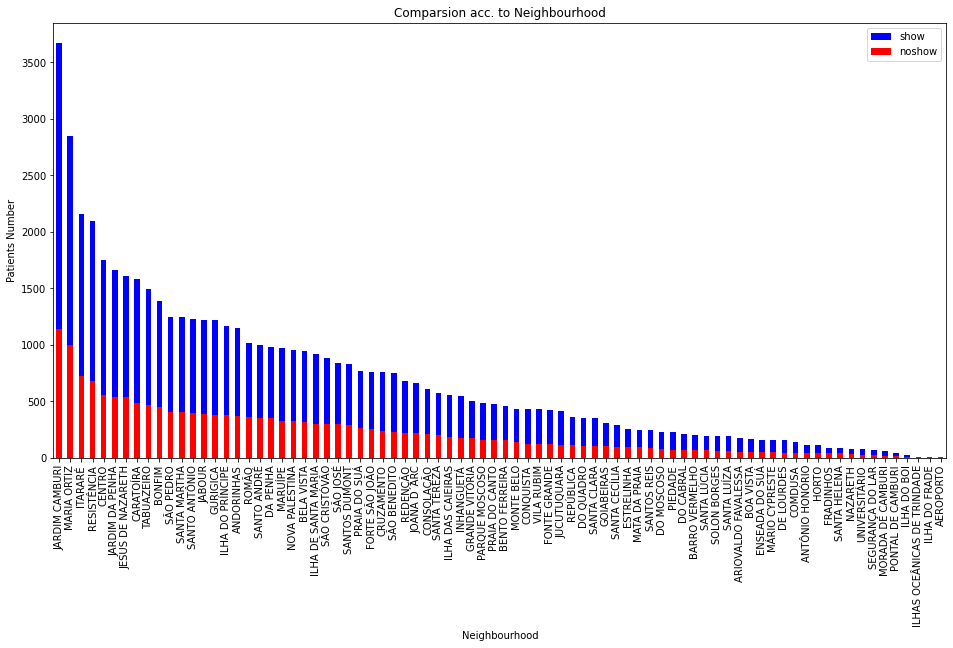

In [32]:

#Neighbourhood affect on attendence or not ?
plt.figure(figsize=[16,8])
df.Neighbourhood[show].value_counts().plot(kind='bar',color='blue',label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparsion acc. to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patients Number');


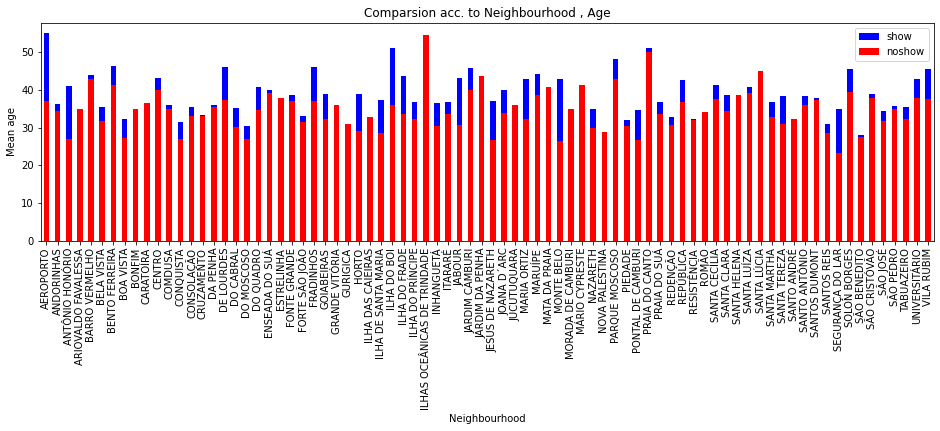

In [33]:
plt.figure(figsize=[16,4])
df[show].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='blue',label='show')
df[noshow].groupby('Neighbourhood').Age.mean().plot(kind='bar',color='red',label='noshow')
plt.legend();
plt.title('Comparsion acc. to Neighbourhood , Age')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean age');

## Conclusions

Neighbourhood has affect on attendance or not ,JARDIM has the greatest number of patients and also showing rate.

Number of showing patients from neighbourhood affected by receiving a message

Age has affect on showing rate 
 
Number of showing patients without receiving SMS is greater than showing patients with receiving SMS ,that mean we need to send SMS again.

## Limitations

No clear connection showing and gender ,The dataset is sufficient to give a good judgement,Dropping lines from the dataset wasn't an issue affecting accuracy of the analysis .